In [106]:
import numpy as np
import pandas as pd
from IPython.display import Image

### 1
Найти xy координаты монохроматического цвета 555 nm (отражающая способность 1.0)  
Источник освещения D65  
Модель наблюдателя соответствует CIE 1931 (2 градуса)  

In [107]:
cie = pd.read_csv("cccie31.csv")
cie


,wave,x,y,z
0,360,0.175560,0.005294,0.819146
1,365,0.175161,0.005256,0.819582
2,370,0.174821,0.005221,0.819959
3,375,0.174510,0.005182,0.820309
4,380,0.174112,0.004964,0.820924
...,...,...,...,...
90,810,0.734690,0.265310,0.000000
91,815,0.734690,0.265310,0.000000
92,820,0.734690,0.265310,0.000000
93,825,0.734690,0.265310,0.000000


In [108]:
cie[cie.wave==555]

,wave,x,y,z
39,555,0.337363,0.658848,0.003788


----------------------------

### 2
Даны координаты в системе sRGB(0,75 0,5 0,25) (Гамма=2,2 ; источник освещения D65)  
Найти XYZ координаты  
Найти XYZ координаты при изменении D65 на D50 по методу Бредфорда (Bradford)  

In [109]:
def getSRGBtoXYZ(xyYR, xyYG, xyYB, xyzW):
    def XYZ(xyY):
        return (xyY[0]/xyY[1], 1, (1 - xyY[0] - xyY[1]) / xyY[1])

    M = np.array([XYZ(xyYR), XYZ(xyYG), XYZ(xyYB)]).T
    M_inv = np.linalg.inv(M)
    S = M_inv.dot(xyzW)

    return M*S

linearazie = lambda v: v/12.92 if v <= 0.04045 else np.power(((v+0.018)/1.018), 2.2)

sRGB = np.array([0.75, 0.5, 0.25])
sRGB_lin = np.array(list(map(linearazie, sRGB)))


sRGBtoXYZ = getSRGBtoXYZ(
    [0.6400, 0.3300, 0.212656],
    [0.3000, 0.6000, 0.715158],
    [0.1500, 0.0600, 0.072186],
    [0.95047, 1.00000, 1.08883]
)


print(f"{sRGBtoXYZ=}")
print(f"{sRGB=}")
print(f"{sRGB_lin=}\n")

print(
    "XYZ:",
    sRGBtoXYZ.dot(sRGB_lin)
)

sRGBtoXYZ=array([[0.41245644, 0.35757608, 0.18043748],
       [0.21267285, 0.71515216, 0.07217499],
       [0.0193339 , 0.11919203, 0.95030408]])
sRGB=array([0.75, 0.5 , 0.25])
sRGB_lin=array([0.53795949, 0.22619362, 0.05307029])

XYZ: [0.31234215 0.28000258 0.08779424]


In [110]:
def getXYZtoXYZ(xyzWS, xyzWD):
    M_A = np.array([
        [ 0.8951000,   0.2664000,  -0.1614000],
        [-0.7502000,  1.7135000,  0.0367000],
        [ 0.0389000,  -0.0685000,   1.0296000]
    ])

    M_A_inv = np.linalg.inv(M_A)
    s = M_A.dot(xyzWS)
    d = M_A.dot(xyzWD)
    diag = np.diag(d/s)

    return M_A_inv.dot(diag).dot(M_A)

D65toD50 = getXYZtoXYZ(
    [0.95047, 1.00000, 1.08883],
    [0.96422, 1.00000, 0.82521]
)

print(f"{D65toD50=}\n")
print(
    "XYZ D50:",
    D65toD50.dot(sRGBtoXYZ.dot(sRGB_lin))
)


D65toD50=array([[ 1.04781124,  0.0228866 , -0.05012698],
       [ 0.0295424 ,  0.9904844 , -0.0170491 ],
       [-0.00923449,  0.01504362,  0.75213164]])

XYZ D50: [0.32928307 0.28506872 0.06736076]


-------------------------------

### 3
Гистограмма изображения задана линией y=х.  
Постройте LUT для эквализации гистограммы.  
Постройте LUT для инверсии изображения.  

#### Эквализация
<center>Функция распределения, где H(j) - начальная гистограмма</center>

$$
H'(x) = \sum_{j=0}^{x-1}H(j)
$$

<center>Тогда формула пикселя эквализированного изображения:</center>

$$
equalized(x, y) = H'(I(x, y))
$$

#### Инверсия

$$
LUT[i] = 1 - i
$$

$$ i = y(x) = x $$

$$ LUT[i] = 1 - x $$

$$
inversion(x,y) = 255 - I(x, y)
$$

------------------------------------

### 4
Какие из ранговых фильтров являются сепарабельными? Доказать.  

<center>Сепарабельный фильтр - фильтр, который можно представить ввиде произведения двух векторов</center>

$$ \begin{pmatrix} a_1 \\ ... \\ a_n \end{pmatrix} \times \begin{pmatrix} b_1 & ... & b_n \end{pmatrix} =
\begin{pmatrix}
    a_1 b_1 & \dots  & a_1 b_n \\
    \vdots  & \ddots & \vdots  \\
    a_n b_1 & \dots  & a_n b_n \\
\end{pmatrix}
$$

Каждая строка является линейной комбинацией любой другой строки

Каждый столбец является линейной комбинацией любого другого столбца

Следовательно ранг матрицы, полученной путем произведения двух векторов равен 1

Сепарабельными являются только одноранговые фильтры



----------------------------------

### 5
Преобразуйте цепной код 1527650432 так, чтобы он стал инвариантным по отношению к
выбору начальной точки и к повороту.

Исходный цепной код: `1527650432`

Инвариантность к выбору начальной точки достигается путем сдвига последовательности таким образом, что полученное число -- наименьшее

```
-- 1527650432 -->
-- 2152765043 -->
-- 3215276504 -->
-- 4321527650 -->
-- 0432152765 -->
```

Код инвариантный к выбору начальной точки: `0432152765`

Инвариантность к повороту достигается если рассматривать первую разность значений кода

```
0   4   3   2   1   5   2   7   6   5 [0]
 └4┘ └7┘ └7┘ └7┘ └4┘ └5┘ └5┘ └7┘ └7┘ └3┘
```

Код инвариантный к повороту: `4777455773`

----------------------------------------

### 6
Дано бинарное изображение равностороннего треугольника со стороной 6  
Как будет выглядеть эрозия и дилатация этого изображения с квадратом стороной 2  

Черный треугольник - исходный

Синий треугольник - фигура после применения операции:
* слева - дилатация
* справа - эррозия

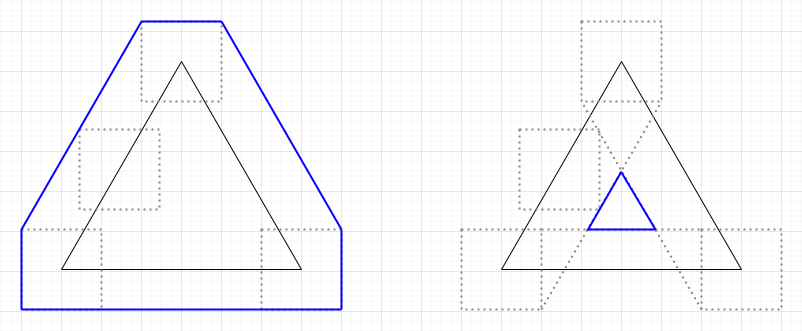

In [111]:
Image(filename="err_dill.drawio.png")

--------------------------------

### 7
Дано изображение шахматного поля с клетками размером nxn пикселей.  
Какие параметры сдвига будут порождать матрицу смежности (GLCM) диагонального вида?

Матрица значений яркости

$$
{}^n \! \overset{n}{
    \begin{pmatrix}
        0 & 1 & 0 & \dots & 1 \\
        1 & 0 & 1 & \dots & 0 \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & 0 & 1 & \dots & 0 \\
    \end{pmatrix}
}
$$

Используется всего два уровня яркости, следовательно матрица GLCM имеет размер $2\times2$

$$
\begin{matrix}
  &    0   &    1   \\
0 & a_{00} & a_{01} \\
1 & a_{10} & a_{11} \\
\end{matrix}
$$

Для построения данной матрицы необходимо опеределить соседний пиксель, который параметризуется направлением $\varphi$ и расстоянием $d$.
* $ \varphi $ - угол ( $0^{\circ}, 45^{\circ}, 90^{\circ}, 135^{\circ}, 180^{\circ}, 225^{\circ}, 270^{\circ}, 315^{\circ} $)
* $d$ - расстояние в пикселях

Из-за повторяемости шаблона изображение стоит рассматривать $d$ как четное и нечетное, а углы  $0^{\circ}$, $45^{\circ}$.

Матрицы для нечетного расстояния:
$$
\varphi = 0 ^{\circ} \;\begin{pmatrix} 0 & a_{01} \\ a_{10} & 0 \\ \end{pmatrix};\;
\varphi = 45^{\circ} \;\begin{pmatrix} a_{00} & 0 \\ 0 & a_{11} \\ \end{pmatrix};\;
$$

Матрицы для четного расстояния:
$$
\varphi = 0 ^{\circ} \;\begin{pmatrix} a_{00} & 0 \\ 0 & a_{11} \\ \end{pmatrix};\;
\varphi = 45^{\circ} \;\begin{pmatrix} a_{00} & 0 \\ 0 & a_{11} \\ \end{pmatrix};\;
$$

Т.е. в случае, когда $d$ - нечетное, а $\varphi$ - вертикальное или горизонтальное, матрица смежности не является диагональной.

Во всех остальных случаях матрица смежности -- диагональна.

--------------------------------------------

### 8
К каким трансформациям (2D) изображения не инвариантен детектор Харриса?

* Масштаб - при изменении масштаба изображениия, необходимо корректировать размер окна, поскольку линии,
которые раньше образовавывали угол, теперь определяются детектором как сплошной контур.  

* Наличие шума - алгоритм допускает небольшое количество ошибок. Однако большое количество шумов рядом с
контуром приводит к значительному изменению собственных чисел матрицы окна, что изменяет значения детектора.  

* Интенсивость - алгоритм частично инвариантен к изменению интенсивности, необходимо изменять значения порогов
детектора.  

--------------------------------

### 9
Дано бинарное изображение прямоугольника 4x2 пикселя  

Посчитайте:
1. Компактность
2. Эксцентриситет
3. Центр масс
4. Ориентацию главной оси инерции
5. Первые 4-ре момента Hu

In [112]:
w = 4
h = 2

def m(p,q):
    return sum([(x**p)*(y**q) for x in range(w) for y in range(h)])

def cm(p, q):
    return sum([((x-m(1,0)/m(0,0))**p)*((y-m(0,1)/m(0,0))**q) for x in range(w) for y in range(h)])

def eta(p, q):
    return cm(p,q)/np.power(cm(0,0), (p+q+2)/2)


In [113]:
p = (w + h)*2
a = w*h
print("Compactness:", p**2/a)

Compactness: 18.0


In [114]:
m_20 = cm(2,0)
m_02 = cm(0,2)
m_11 = cm(1,1)

print(
    "Elongation:",
    (m_20 + m_02 + np.sqrt((m_20 - m_02)**2 + 4*m_11**2))/
    (m_20 + m_02 - np.sqrt((m_20 - m_02)**2 + 4*m_11**2))
)

Elongation: 5.0


In [115]:
print(
    "Center:",
    (m(1,0)/m(0,0), m(0,1)/m(0,0))
)

Center: (1.5, 0.5)


In [116]:
print(
    "Principal inertia axis",
    0.5*np.arctan(2*m_11/(m_20-m_02))
)

Principal inertia axis 0.0


In [117]:
hu_1 = eta(0,2) + eta(2,0)

hu_2 = (eta(2,0) - eta(0,2))**2 + 4*eta(1,1)**2

hu_3 = (eta(3,0) - 3*eta(1,2))**2 + (3*eta(2,1) - cm(0,3))**2

hu_4 = (eta(3,0) - eta(1,2))**2 + (eta(2,1) + cm(0,3))**2

print(f"{hu_1=}")
print(f"{hu_2=}")
print(f"{hu_3=}")
print(f"{hu_4=}")


hu_1=0.1875
hu_2=0.015625
hu_3=0.0
hu_4=0.0


-------------------------

### 10
Чему равна сумма коэффициентов wavelet-фильтров? Скалирующей функции?  
Какая связь с квадратурными зеркальными фильтрами?

Сумма коэффициентов wavelet-фильтров равна $1$

Сумма коэффициентов скалирующей функции равна $\sqrt{2}$

<br>

Дискретное вейлвлет-преобразование получают путем применения набора фильтров.

Сначала сигнал пропускается через низко-частотный фильтр, в результате чего получаются коэффициенты аппроксимации.

Затем сигнал пропускается через высоко-частотный фильтр, в резлуьтате чего получаются коэффициенты детализации.

Данные НЧ и ВЧ фильтры связаны и называются квадратурными зеркальными фильтрами (QMF).

-----------------------------------------

### 11

Есть камера с фокусным расстоянием 10 см, размером кадра 1920х1080, размер пикселя 10 микрон,  
центр проекции находится на пикселе с координатами 950,550, угол наклона матрицы равен 0.  
Запишите матрицу внутренней калибровки камеры (intrinsic parameters)

Матрица внутренней калибровки имеет вид:

$$
\begin{bmatrix}
\alpha_x & \gamma & u_0 \\
0 & \alpha_y & v_0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

$\alpha = f/px$, где $f$ - фокусное расстояние, $px$ - размер пикселя.

$\alpha_x = 100/0.01 = 10000$

$\alpha_y = 100/0.01 = 10000$

$\gamma = \alpha_x * tg(\varphi)$, где $\varphi$ - угол наклона матрицы

$\gamma = 10000 * tg(0) = 0$

Тогда, матрица калибровки принимает вид:

$$
\begin{bmatrix}
10000 & 0 & 950 \\
0 & 10000 & 550 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

-----------------------------